## Iterative deepening depth-first search

Find the shortest route from the <font color='Aquamarine'>**starting point**</font> to the <font color='Gold'>**end point**</font>, avoiding <font color='CornflowerBlue'>**walls**</font>.

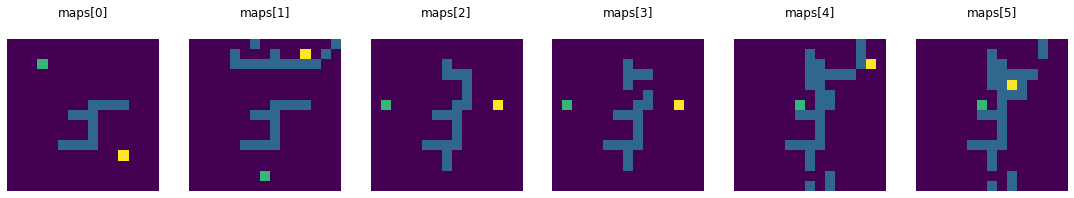

In [1]:
import matplotlib.pyplot as plt
from collections import deque

maps = []

# importing maps
with open('grids - py.txt') as file:
    grid = []
    for line in file.read().splitlines():
        if not line:
            maps.append(grid)
            grid = list()
            continue
        row = [int(n.strip()) for n in line.split(",")]
        grid.append(row)

# visualising maps
fig, axes = plt.subplots(1, len(maps), sharex=True, sharey=True, figsize=(19, 3))
for i in range(len(maps)):
    axes[i].matshow(maps[i])
    axes[i].set_title(f"maps[{i}]")
    axes[i].axis('off')

Note that the last map has no solution, as the end point is surrounded by walls.

maps[0]


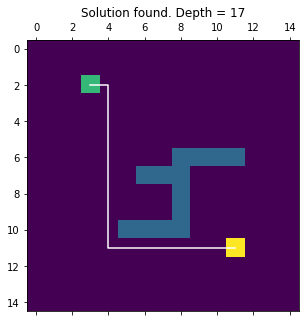

maps[1]


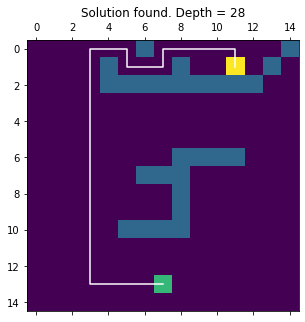

maps[2]


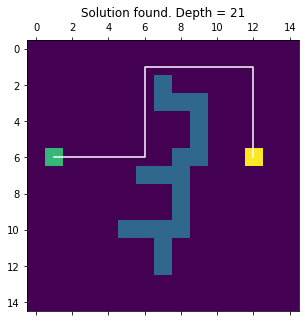

maps[3]


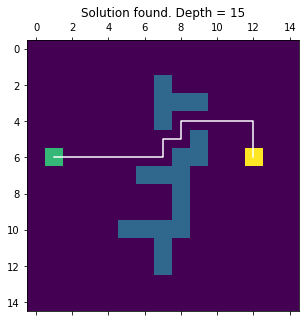

maps[4]


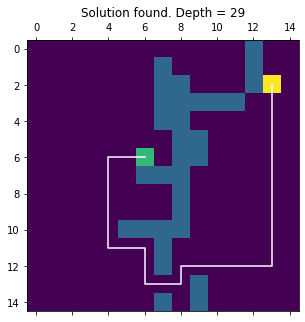

maps[5]
Solution not found!


In [2]:
# node class
class Node:
    def __init__(self, row, col, depth, parent=None):
        self.row = row
        self.col = col
        self.parent = parent
        self.depth = depth

    def __str__(self):
        return f"({self.row}, {self.col}), parent = {self.parent}"

def iddfs(grid):

    # saving height and width into variables for easy access
    height = len(grid)
    width = len(grid[0])

    # function to find the starting point
    def find_start(grid):
        for i in range(height):
            for j in range(width):
                if grid[i][j] == 2:
                    return Node(i, j, depth=0)

    # depth-limited search
    def dfs(grid, start, limit):

        # visited is a dictionary storing 
        # (row, column) tuples as keys and depths as values
        visited = {}

        stack = deque([start])

        cutoff = False

        while stack:
            node = stack.pop()
            if node.depth < limit:
                r = node.row
                c = node.col
                d = node.depth
                # if the node has not been visited, or has been visited at a higher depth
                if (r,c) not in visited or visited[(r,c)] > d:
                    visited[(r,c)] = d
                    neighbours = [(r+1, c), (r-1, c), (r, c+1), (r, c-1)]
                    for x, y in neighbours:
                        # checking that the coordiantes are in the grid
                        if 0 <= x < height and 0 <= y < width:
                            if grid[x][y] == 3:
                                return Node(x, y, node.depth+1, node)
                            elif grid[x][y] == 0:
                                new_n = Node(x, y, node.depth+1, node)
                                stack.append(new_n)
                                      
            # if the node wasn't explored due to depth limit, we set cutoff as True
            else:
                cutoff = True
        
        return False if cutoff else "fail"

    # function for visualising the path
    def visualise(grid, node):
        
        depth = node.depth

        # converting end node into a list of tuples with coordinates
        def solution_to_path(node, path=[]):
            if not node:
                return path
            path.append((node.row, node.col))
            return solution_to_path(node.parent, path)

        path = solution_to_path(node) 

        y, x = zip(*path)

        fig, ax = plt.subplots(figsize=(5,5))
        ax.matshow(grid)
        ax.set_title(f"Solution found. Depth = {depth}")
        ax.plot(x, y, color="white")

        plt.show()


    def iterative_deepening(grid, start):
        # depth cannot be deeper than the number of cells in the grid
        for i in range(1, height*width):
            result = dfs(grid, start, i)
            # if result is node or "fail"
            if result:
                if result == "fail":
                    print("Solution not found!")
                    break
                else:
                    visualise(grid, result)
                    break
            # if result is False, the loop continues

    start = find_start(grid)

    iterative_deepening(grid, start)

for i in range(len(maps)):
    print(f"maps[{i}]")
    iddfs(maps[i])